In [59]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df = pd.read_csv("wind_dataset.csv")

df

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5
...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,14.46,0,16.8,0.0,9.8,0.0,4.0,0.0
6570,1978-12-28,14.33,0,16.0,0.0,9.1,0.0,8.5,8.0
6571,1978-12-29,19.17,0,14.7,0.0,5.0,0.0,3.5,3.2
6572,1978-12-30,18.08,0,4.9,0.0,2.9,0.0,0.3,-0.5


In [60]:
df_nan = df.loc[:, df.isna().any()]
df_nan.isnull().sum() / len(df_nan) * 100

,0
IND.1,0.927898
T.MAX,9.446304
IND.2,0.927898
T.MIN,10.252510
T.MIN.G,5.476118


In [61]:

df["T.MAX"] = df["T.MAX"].fillna(method='ffill')
df["T.MIN"] = df["T.MIN"].fillna(method='bfill')
df["T.MIN.G"] = df["T.MIN.G"].fillna(method='ffill')
df["IND.1"] = df["IND.1"].fillna(method='bfill')
df["IND.2"] = df["IND.2"].fillna(method='ffill')

<ipython-input-61-4c6847f6d8e7>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["T.MAX"] = df["T.MAX"].fillna(method='ffill')
<ipython-input-61-4c6847f6d8e7>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["T.MIN"] = df["T.MIN"].fillna(method='bfill')
<ipython-input-61-4c6847f6d8e7>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["T.MIN.G"] = df["T.MIN.G"].fillna(method='ffill')
<ipython-input-61-4c6847f6d8e7>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["IND.1"] = df["IND.1"].fillna(method='bfill')
<ipython-input-61-4c6847f6d8e7>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future v

In [62]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['YEAR'] = df['DATE'].dt.year
df['MONTH'] = df['DATE'].dt.month
df['DAY'] = df['DATE'].dt.day

df

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G,YEAR,MONTH,DAY
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0,1961,1,1
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1,1961,1,2
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5,1961,1,3
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2,1961,1,4
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5,1961,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,14.46,0,16.8,0.0,9.8,0.0,4.0,0.0,1978,12,27
6570,1978-12-28,14.33,0,16.0,0.0,9.1,0.0,8.5,8.0,1978,12,28
6571,1978-12-29,19.17,0,14.7,0.0,5.0,0.0,3.5,3.2,1978,12,29
6572,1978-12-30,18.08,0,4.9,0.0,2.9,0.0,0.3,-0.5,1978,12,30


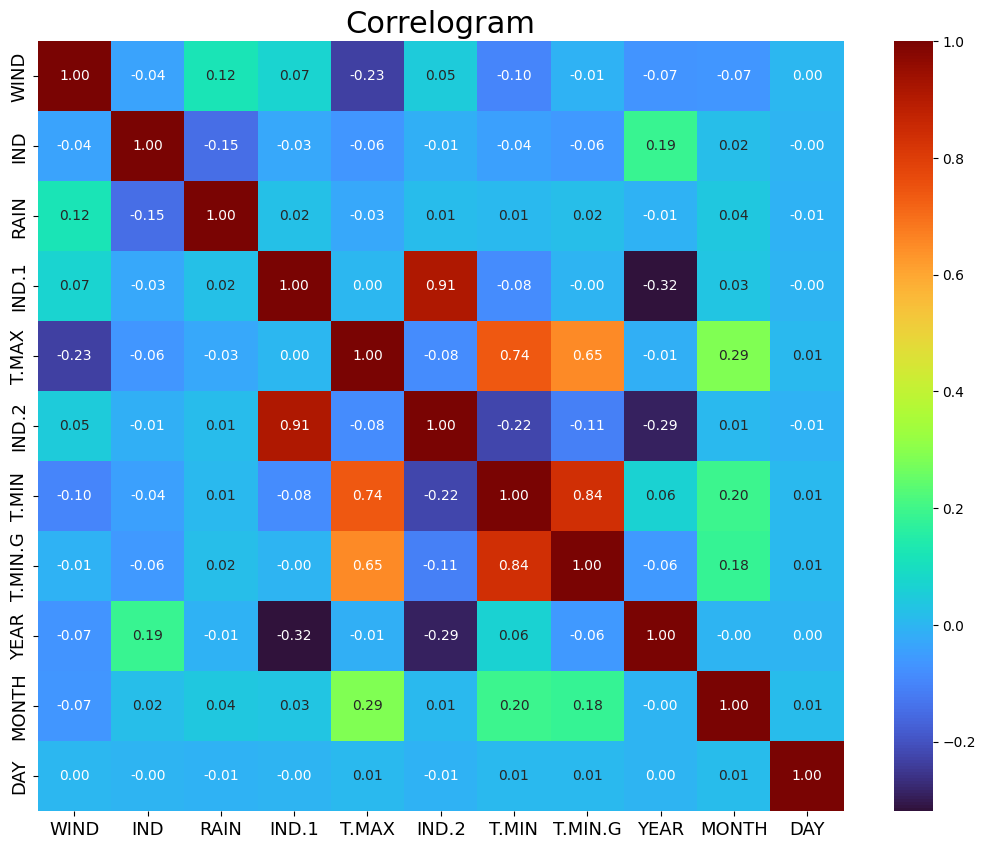

In [63]:

df.corr(numeric_only=True)

plt.figure(figsize=(13,10))

corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, cmap="turbo", annot=True, fmt=".2f")
plt.title('Correlogram', fontsize=22)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.show()

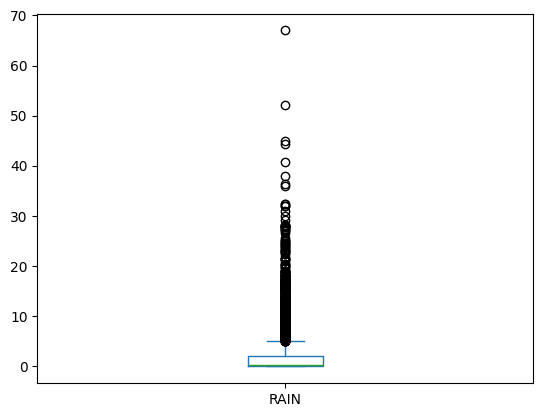

0.0 5.6 5.6


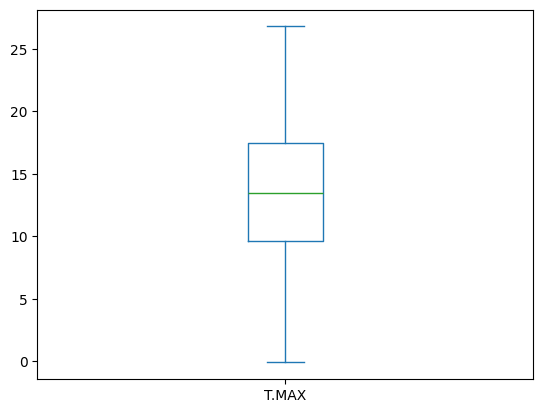

9.6 7.9 17.5


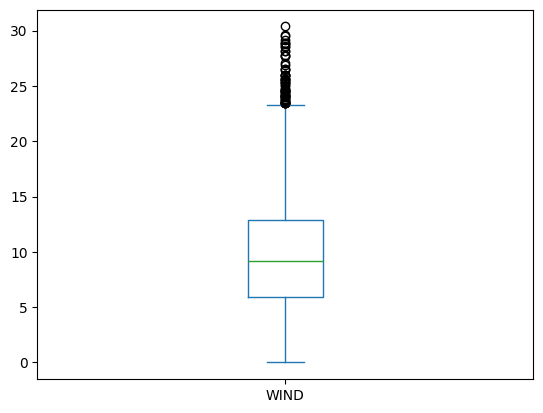

5.96 6.96 12.92


In [64]:

df['RAIN'].plot(kind='box')
plt.show()
Q1 =  df['RAIN'].quantile(0.25)
Q3 = df['RAIN'].quantile(0.9)
IQR = Q3 - Q1

print(Q1,IQR,Q3)

df=df[(df['RAIN'] > Q1-1.5*IQR) & (df['RAIN']< Q3+1.5*IQR)]

df['T.MAX'].plot(kind='box')
plt.show()
Q1 =  df['T.MAX'].quantile(0.25)
Q3 = df['T.MAX'].quantile(0.75)
IQR = Q3 - Q1

print(Q1,IQR,Q3)

df=df[(df['T.MAX'] > Q1-1.5*IQR) & (df['T.MAX']< Q3+1.5*IQR)]

df['WIND'].plot(kind='box')
plt.show()
Q1 =  df['WIND'].quantile(0.25)
Q3 = df['WIND'].quantile(0.75)
IQR = Q3 - Q1

print(Q1,IQR,Q3)

df=df[(df['WIND'] > Q1-1.5*IQR) & (df['WIND']< Q3+1.5*IQR)]


In [65]:
X = df.iloc[:,[3,5]].values
Y = df.iloc[:,1].values


In [66]:
mmsc = MinMaxScaler()
X_norm = mmsc.fit_transform(X)
X_norm_df = pd.DataFrame(X_norm)

In [67]:
print(df.iloc[:,1])
X_train, X_test, y_train, y_test = train_test_split(X_norm, Y, test_size=0.3)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Test dataset size: {X_test.shape}, {y_test.shape}')

0       13.67
1       11.50
2       11.25
3        8.63
4       11.92
        ...  
6566    12.25
6567     8.71
6568     1.96
6572    18.08
6573    19.25
Name: WIND, Length: 6359, dtype: float64
Train dataset size: (4451, 2), (4451,)
Test dataset size: (1908, 2), (1908,)


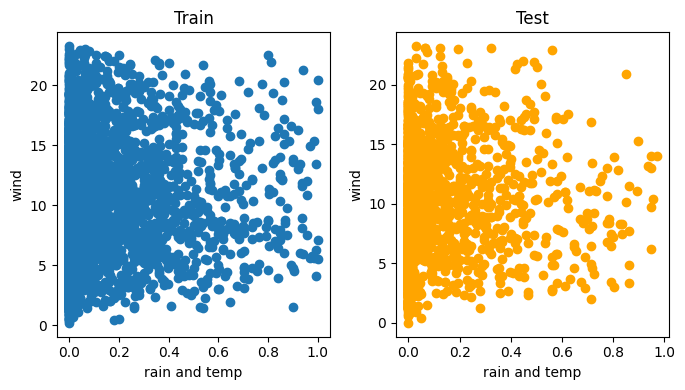

In [68]:
fig, axes = plt.subplots(1, 2)

axes[0].scatter(X_train[:, 0], y_train, label='Train Data')
axes[1].scatter(X_test[:, 0], y_test, label='Test Data', color='orange')

axes[0].set_title('Train')
axes[0].set_xlabel('rain and temp')
axes[0].set_ylabel('wind')

axes[1].set_title('Test')
axes[1].set_xlabel('rain and temp')
axes[1].set_ylabel('wind')

fig.set_size_inches(7, 4)
plt.tight_layout()
plt.show()

In [69]:

lig_reg = LinearRegression()
lig_reg.fit(X_train, y_train)
y_pred = lig_reg.predict(X_test)

MAE: 3.7415914334401035
MSE: 20.964154641043756
R2: 0.04758803439844428


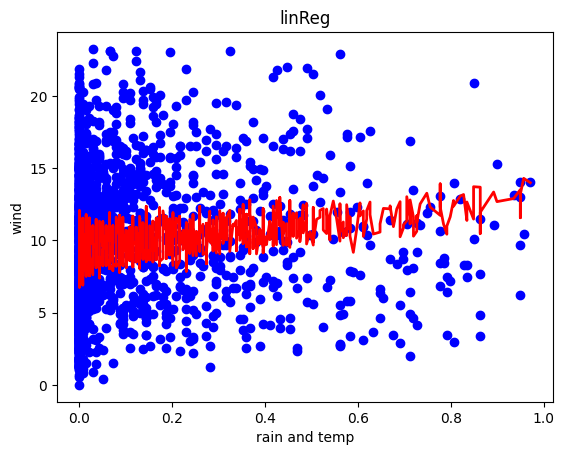

In [70]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

sorted_indices = np.argsort(X_test[:, 0])
X_test_sorted = X_test[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

plt.scatter(X_test[:, 0], y_test, color='blue')
plt.plot(X_test_sorted[:, 0], y_pred_sorted, color='red', linewidth=2)
plt.xlabel('rain and temp')
plt.ylabel('wind')
plt.title('linReg')
plt.show()